In [1]:
pip install geopandas watermark -q

     |████████████████████████████████| 1.0 MB 13.1 MB/s 
     |████████████████████████████████| 6.3 MB 15.6 MB/s 
     |████████████████████████████████| 16.7 MB 66.8 MB/s 
     |████████████████████████████████| 1.6 MB 71.5 MB/s 


In [2]:
import os
import pandas as pd
import numpy as np
import geopandas as gpd

In [3]:
%reload_ext watermark
%watermark -iv -a 'Dan Levine' -u -d -v

Author: Dan Levine

Last updated: 2022-08-22

Python implementation: CPython
Python version       : 3.7.13
IPython version      : 7.9.0

numpy    : 1.21.6
pandas   : 1.3.5
geopandas: 0.10.2



In [ ]:
if not os.path.exists('raw data'):
  os.mkdir('raw data')
os.chdir('raw data')

## fetch geometries

#### Tracts

In [ ]:
# download Tracts from all states

In [ ]:
if not os.path.exists('tracts'):
  os.mkdir('tracts')
os.chdir('tracts')

In [ ]:
!curl "https://www2.census.gov/geo/tiger/TIGER2019/TRACT/tl_2019_[01-78]_tract.zip" --output "#1.zip"

In [ ]:
# combine. open each state (skip numbers that don't have data), then append

tracts_geom = gpd.read_file('01.zip')

for state_fips in range(2,78):
  state_fips = str(state_fips).zfill(2)
  try:
    state_tracts_geom = gpd.read_file(f'{state_fips}.zip')
  except:
    continue

  tracts_geom = tracts_geom.append(state_tracts_geom)

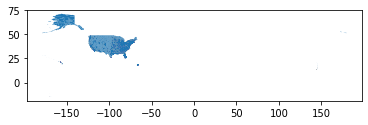

In [ ]:
tracts_geom.plot()

In [ ]:
os.chdir('..')

In [ ]:
os.mkdir('all_tracts_2019')
tracts_geom.to_file('all_tracts_2019/all_tracts_2019.shp')

#### Tracts clipped to shoreline

In [ ]:
# from https://www.census.gov/geographies/mapping-files/time-series/geo/cartographic-boundary.2019.html

!curl "https://www2.census.gov/geo/tiger/GENZ2019/shp/cb_2019_us_tract_500k.zip" --output "tracts_clipped.zip"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 49.7M    0 49.7M    0     0  20.1M      0 --:--:--  0:00:02 --:--:-- 20.1M


#### ZIPS

In [ ]:
!curl "https://www2.census.gov/geo/tiger/TIGER2019/ZCTA5/tl_2019_us_zcta510.zip" --output "ZIPs.zip"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  509M    0  509M    0     0  27.1M      0 --:--:--  0:00:18 --:--:-- 28.4M


In [ ]:
zip_geom = gpd.read_file('ZIPs.zip')

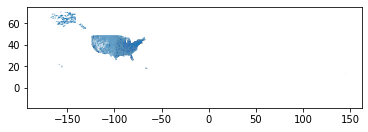

In [ ]:
zip_geom.plot()